In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
from utils import load_rx_data, load_tx_data, tx_aloha_files, rx_aloha_files

In [3]:
data = load_tx_data(tx_aloha_files[0])

In [4]:
data.timestamp -= data.timestamp.min()
data

,packet_number,ack,timestamp
0,0,1,0.00
1,1,1,0.28
2,2,1,0.60
3,3,1,0.88
4,4,1,1.19
...,...,...,...
338,321,1,174.78
339,322,1,175.13
340,323,1,175.50
341,324,1,175.91


In [5]:
def per(df, timestamp):
    data = df[df['timestamp'] <= timestamp]
    pdr = data.ack.mean()
    per = 1 - pdr
    return per

In [6]:
def generate_per_graph(dataframe, title, outfile=None):
    dataframe.timestamp -= dataframe.timestamp.min()

    per_data = np.asarray([
        (i, per(dataframe, i)) for i in range(180)
    ])

    plt.plot(per_data[:,0], per_data[:,1], label="Primary Node")
    
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("PER")
    plt.legend()
    if outfile:
        plt.savefig(outfile)
    plt.show()

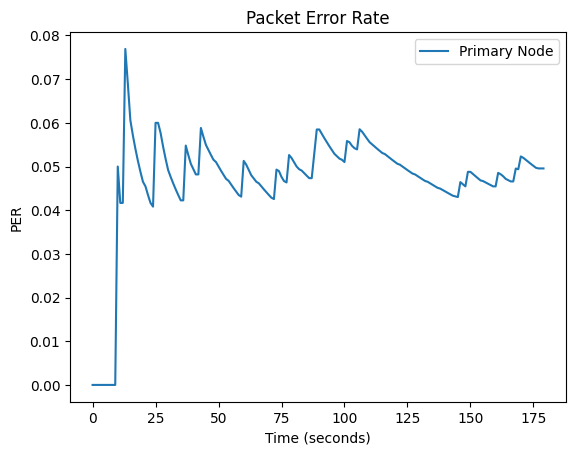

In [8]:
data = load_tx_data(tx_aloha_files[0])
generate_per_graph(data, 'Packet Error Rate', outfile='aloha_sensor_per_legend.png')